# Importing all the necessary libraries for insight generation 

In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns 



### Loading all the datasets to perform EDA

In [67]:
Cust =pd.read_csv('/Users/saumyajha/Desktop/Customers.csv')
Prod=pd.read_csv('/Users/saumyajha/Desktop/Products.csv')
Trans =pd.read_csv('/Users/saumyajha/Desktop/Transactions.csv')



## Getting 5 business Insights from the given dataset 

### Checking basic stats , data types and memory used 

In [68]:
print(Cust.info())
print(Prod.info())
print(Trans.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------

### Checking for non null and missing values 


In [69]:
Cust.isnull().sum()
Prod.isnull().sum()
Trans.isnull().sum()


TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64

# Univariate Analysis 
1.Distribution of Customers by Region

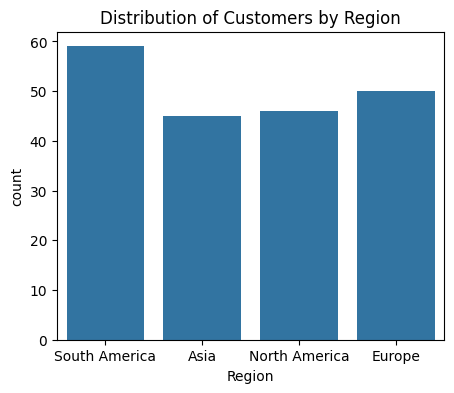

In [86]:
plt.figure(figsize=(5,4))
sns.countplot(x='Region',data=Cust)
plt.title('Distribution of Customers by Region')
plt.show()

1.Distribution of Products by Category

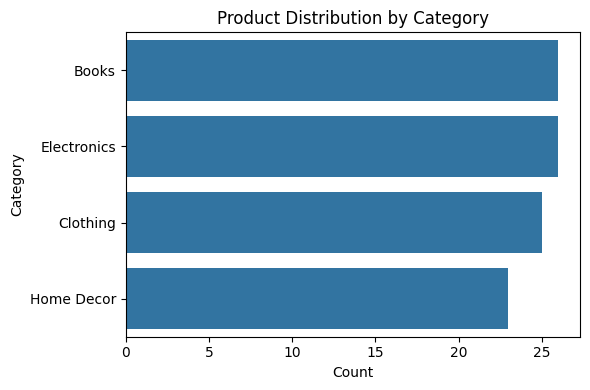

In [90]:
plt.figure(figsize=(6,4))
sns.countplot(data=Prod, y='Category', order=Prod['Category'].value_counts().index)
plt.title('Product Distribution by Category')
plt.xlabel('Count')
plt.ylabel('Category')
plt.tight_layout()
plt.savefig('product_distribution_by_category.png')
plt.show()


## Bivariate Analysis 
#### Total Spend by Region

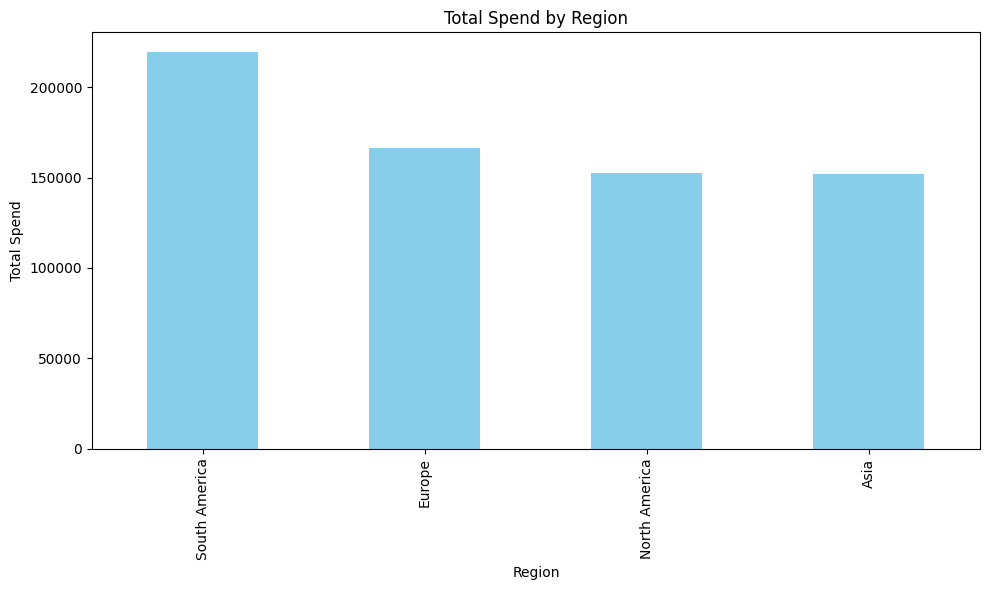

In [91]:
merged_data = Trans.merge(Cust, on='CustomerID', how='left')
region_spend = merged_data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
region_spend.plot(kind='bar', color='skyblue')
plt.title('Total Spend by Region')
plt.xlabel('Region')
plt.ylabel('Total Spend')
plt.tight_layout()
plt.savefig('total_spend_by_region.png')
plt.show()

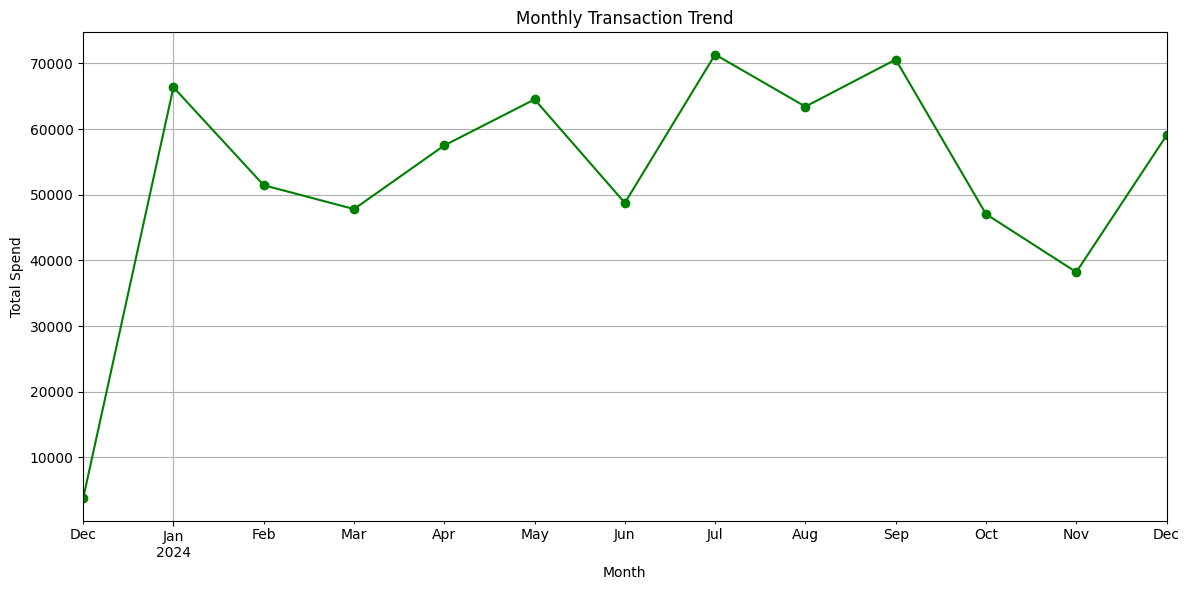

In [92]:
Trans['TransactionDate'] = pd.to_datetime(Trans['TransactionDate'])
Trans['Month'] = Trans['TransactionDate'].dt.to_period('M')
monthly_spend = Trans.groupby('Month')['TotalValue'].sum()
plt.figure(figsize=(12, 6))
monthly_spend.plot(kind='line', marker='o', color='green')
plt.title('Monthly Transaction Trend')
plt.xlabel('Month')
plt.ylabel('Total Spend')
plt.grid(True)
plt.tight_layout()
plt.savefig('monthly_transaction_trend.png')
plt.show()

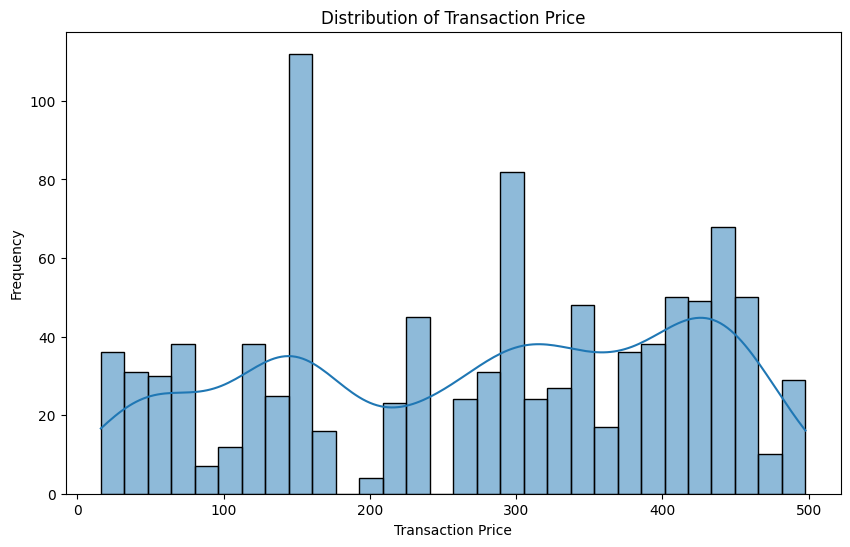

In [71]:

plt.figure(figsize=(10, 6))
sns.histplot(data=Trans['Price'], bins=30, kde=True)
plt.title('Distribution of Transaction Price')
plt.xlabel('Transaction Price')
plt.ylabel('Frequency')
plt.show()

##  Top 5 Business Insight from the given dataset.
#### 1. The majority of customers are concentrated in specific regions like 'South America' and 'Europe' indicating potential for targeted marketing.
#### 2. Product categories such as 'Electronics' and 'Books' dominate sales, suggesting popular product preferences.
#### 3. Peak transaction periods occur during festive seasons, aligning with months July and September.
#### 4. High-value transactions are predominantly made by customers from urban regions like South America .
#### 5. Majority of Transcstions are  concentrated in lower price range between 0 to 200 .

